In [11]:
# Manipulation de données 
import pandas as pd 
import numpy as np



# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns



# Pour supprimer les messages d'erreurs
import warnings

In [12]:
warnings.filterwarnings("ignore")

# CHARGEMENT DES DONNEES

In [13]:
# Initialisation d'un dataframe vide
df = pd.DataFrame()

# Boucle pour ouvrir et concaténer les 10 fichiers
for i in range(1,11):
    df_to_concat = pd.read_csv(f'Data/avis_ugc_part{i}.csv')
    df = pd.concat([df, df_to_concat])

In [14]:
df.head()

,rating,date,review,likes,user_name,user_nb_reviews,user_nb_photos,cinéma,language
0,1,2024-11-10T07:41:44.880Z,Il n’a pas admissible qu’une grosse chaîne de ...,0,anne degroux,2,0,UGC Ciné Cité Les Halles,fr
1,4,2024-11-09T10:32:32.722Z,"Pratique, plein de salles et bonne programmati...",0,Géraldine Sauvenay,3,0,UGC Ciné Cité Les Halles,fr
2,3,2024-11-09T08:45:17.039Z,"Nettoyez vos écrans, ça commence à se voir !",0,M G,2,0,UGC Ciné Cité Les Halles,fr
3,1,2024-11-08T20:13:38.816Z,The theater still has a bed bug problem. Sat d...,0,Cordelia Ryan,2,1,UGC Ciné Cité Les Halles,fr
4,1,2024-11-08T15:32:14.074Z,VOLUME beaucoup trop fort mon dieu!! On était ...,0,Spei,83,0,UGC Ciné Cité Les Halles,fr


# EXPLORATION DES DONNEES

* Maintenant que toutes nos données sont réunies dans un unique DataFrame, nous allons entamer une phase d'exploration pour mieux comprendre leur contenu. Cela nous permettra de vérifier leur intégrité et de repérer d'éventuels problèmes ou incohérences qui pourraient affecter les étapes d'analyse et de modélisation.

In [15]:
def df_info(df:pd.DataFrame) -> pd.DataFrame:
    """
    Retourne un DataFrame résumant les informations principales sur les colonnes d'un DataFrame donné.
    
    Paramètres:
    df (pd.DataFrame): Le DataFrame à analyser.

    Retourne:
    pd.DataFrame: Un DataFrame contenant le type de données, le nombre de valeurs manquantes
                  et les statistiques descriptives pour chaque colonne.
    """
    
    return pd.concat([df.dtypes, df.isna().sum(), df.describe(include='all').T], axis=1).fillna('')

df_info(df)

,0,1,count,unique,top,freq,mean,std,min,25%,50%,75%,max
rating,int64,0,203186.0,,,,4.040155,1.127952,1.0,4.0,4.0,5.0,5.0
date,object,0,203186.0,109484,2019-04-20T21:10:09.804Z,4,,,,,,,
review,object,115904,87282.0,42339,Bien,626,,,,,,,
likes,int64,0,203186.0,,,,0.160592,1.161993,0.0,0.0,0.0,0.0,53.0
user_name,object,2,203184.0,93439,Thomas,63,,,,,,,
user_nb_reviews,int64,0,203186.0,,,,58.126534,106.120612,0.0,6.0,22.0,65.0,3730.0
user_nb_photos,int64,0,203186.0,,,,144.963674,1272.022506,0.0,0.0,4.0,41.0,200769.0
cinéma,object,0,203186.0,37,UGC Ciné Cité Les Halles,19798,,,,,,,
language,object,0,203186.0,2,fr,110822,,,,,,,


Problèmes initiaux observés :
* Colonne `reviews` : Cette colonne contient de nombreuses valeurs manquantes, ce qui pose un problème, car les avis sont essentiels à notre analyse. Nous devrons donc supprimer les lignes contenant ces valeurs manquantes.
* Colonne `date` : La colonne date n'est pas du bon type de données. Nous devrons la convertir pour pouvoir l'utiliser efficacement dans notre analyse.

In [16]:
# Supprime les valeurs manquantes
df = df.dropna()

# Convertit la colonne 'date' en format datetime, en arrondissant à la minute
df.loc[:, 'date'] = pd.to_datetime(df['date']).dt.floor('min')

In [17]:
df_info(df)

,0,1,count,unique,top,freq,mean,std,min,25%,50%,75%,max
rating,int64,0,87280.0,,,,3.77539,1.322904,1.0,3.0,4.0,5.0,5.0
date,object,0,87280.0,46230,2019-08-12 14:08:00+00:00,6,,,,,,,
review,object,0,87280.0,42338,Bien,626,,,,,,,
likes,int64,0,87280.0,,,,0.369764,1.748912,0.0,0.0,0.0,0.0,53.0
user_name,object,0,87280.0,40977,Thomas,41,,,,,,,
user_nb_reviews,int64,0,87280.0,,,,94.43365,139.576531,0.0,17.0,48.0,116.0,3730.0
user_nb_photos,int64,0,87280.0,,,,214.87964,1688.388514,0.0,0.0,9.0,75.0,200769.0
cinéma,object,0,87280.0,37,UGC Ciné Cité Les Halles,8520,,,,,,,
language,object,0,87280.0,2,fr,47492,,,,,,,


In [18]:
df.duplicated().sum()

560

* Certains avis sont présents en plusieurs exemplaires dans le jeu de données. Nous allons donc supprimer les doublons pour garantir que chaque avis soit unique et éviter les biais dans l'analyse.

In [19]:
# Suppretion des doublons
df = df.drop_duplicates().reset_index(drop=True)

# Vérification
df.duplicated().sum()

0

# DATA VISUALISATION

* L'objectif de cette section est d'approfondir notre exploration des données afin de mieux comprendre les relations entre les différentes variables. À travers des visualisations, nous pourrons identifier des tendances, des corrélations, et des schémas potentiels qui enrichiront notre analyse.

In [20]:
df_viz = df.copy()

In [21]:
sns.set_palette('Set2')

### Analyse de la variable cible

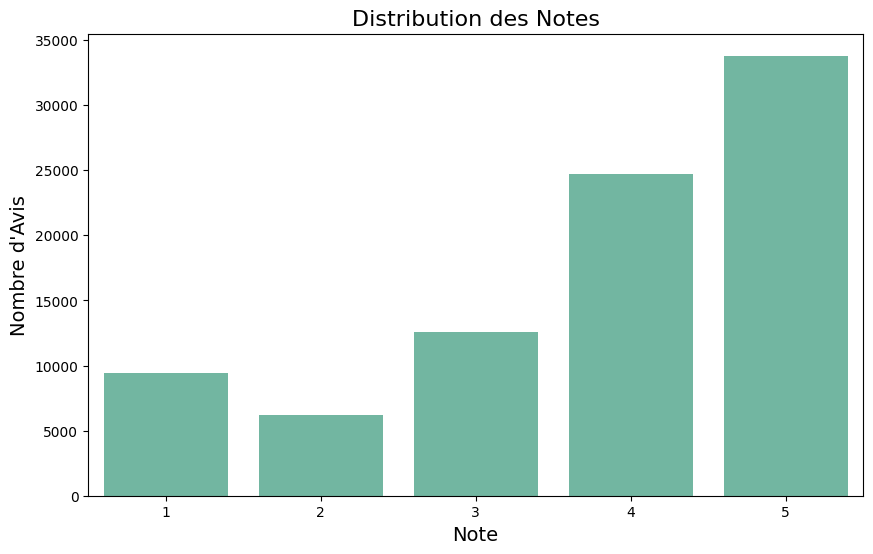

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=df_viz)

plt.title('Distribution des Notes', fontsize=16)
plt.xlabel('Note', fontsize=14)
plt.ylabel('Nombre d\'Avis', fontsize=14)

plt.show()

Ce graphique montre la distribution des notes données par les utilisateurs pour des avis en France. La répartition indique une forte concentration des avis positifs, avec la note de 5 obtenant le plus grand nombre d'avis (plus de 35 000), suivie de la note de 4 avec environ 30 000 avis. Les notes plus faibles, 1 et 2, sont nettement moins fréquentes, ce qui suggère une tendance globale des utilisateurs à donner des avis positifs. + déséquilibre des classes ce qui peut poser problème lors de la phase de modélisation

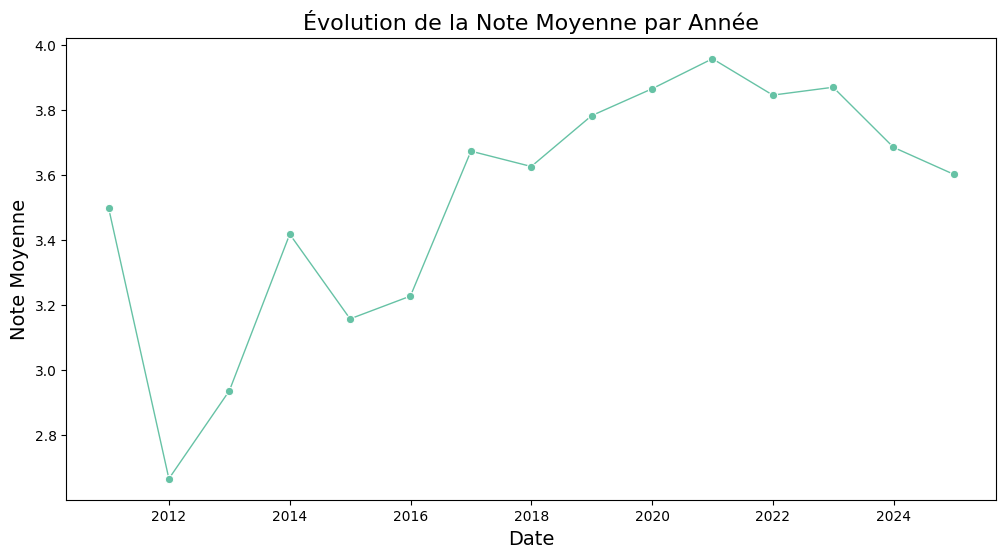

In [23]:
nb_avis_per_month = df_viz.groupby(pd.Grouper(key='date', freq='YE'))['rating'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='rating', data=nb_avis_per_month, marker='o', linewidth=1)

plt.title("Évolution de la Note Moyenne par Année", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Note Moyenne", fontsize=14)

plt.show()

Ce graphique illustre l'évolution de la note moyenne des avis au fil des années. On observe une fluctuation initiale, avec une baisse marquée autour de 2012-2013, suivie d'une reprise progressive et d'une tendance à la hausse jusqu'à atteindre un pic proche de 4 entre 2019 et 2021. Cependant, depuis ce pic, la note moyenne montre une légère baisse, suggérant un déclin récent de la satisfaction des utilisateurs ou une évolution des attentes. Cette tendance descendante pourrait indiquer des facteurs nouveaux influençant la perception ou l'évaluation des utilisateurs.

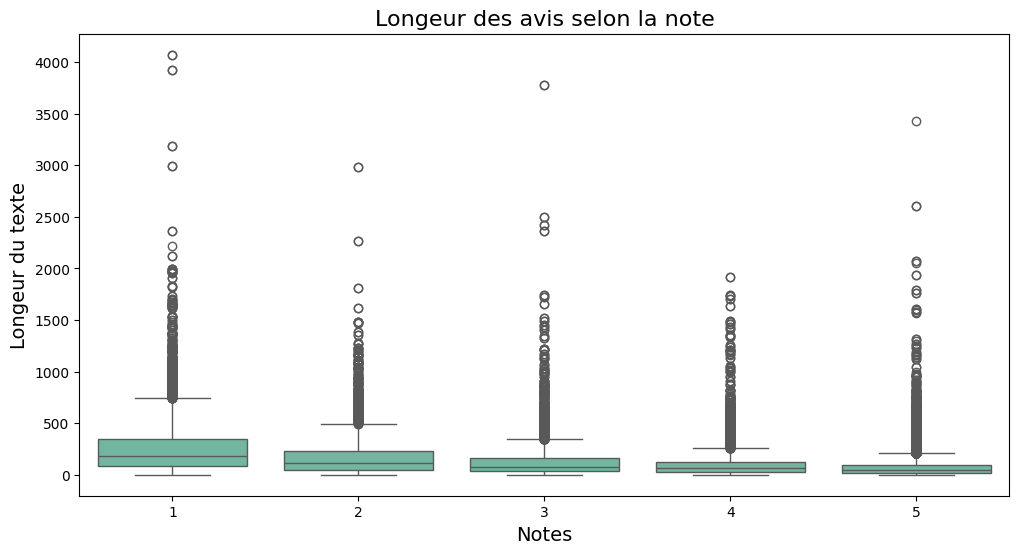

In [24]:
df_viz['len_review'] = df_viz['review'].map(len)

plt.figure(figsize=(12, 6))
sns.boxplot(y='len_review', x='rating', data=df_viz)

plt.title('Longeur des avis selon la note', fontsize=16)
plt.xlabel('Notes', fontsize=14) 
plt.ylabel('Longeur du texte', fontsize=14);

plt.show()

Ce graphique en boîte montre la longueur des avis en fonction de la note attribuée. Il révèle que, quel que soit le niveau de la note (de 1 à 5), la plupart des avis restent dans une plage de longueur relativement similaire avec une médiane stable et quelques avis plus longs en tant que valeurs aberrantes. Les avis les plus courts, situés au niveau de la boîte, sont majoritaires, tandis que les avis les plus longs apparaissent sous forme de points au-dessus. Les avis extrêmes dépassant 1000 caractères sont rares, et il n'y a pas de tendance évidente indiquant que des notes spécifiques (basses ou hautes) correspondent à des avis plus détaillés.

###  Analyse des avis

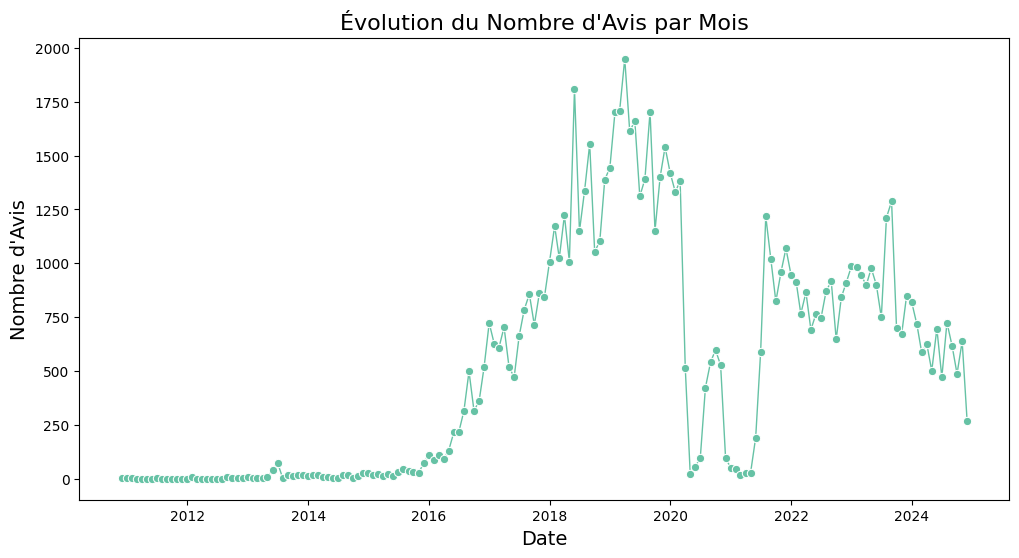

In [25]:
nb_avis_per_month = df_viz.groupby(pd.Grouper(key='date', freq='ME'))['rating'].count().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='rating', data=nb_avis_per_month, marker='o', linewidth=1)

plt.title("Évolution du Nombre d'Avis par Mois", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Nombre d'Avis", fontsize=14)

plt.show()

Ce graphique illustre l'évolution mensuelle du nombre d'avis au fil du temps. On observe une augmentation marquée du nombre d'avis à partir de 2016, avec un pic atteint entre 2018 et 2020. Après ce pic, le nombre d'avis montre une tendance à la baisse, bien qu'il y ait des variations périodiques. La chute significative autour de 2020 pourrait être liée à des événements externes influençant le volume d'avis, possiblement en raison de changements dans les comportements des utilisateurs ou de facteurs contextuels tels que des restrictions ou des modifications d'accès à certains services. Après cette baisse, le nombre d'avis reste globalement inférieur aux années de pic mais affiche une certaine stabilité avec des fluctuations.

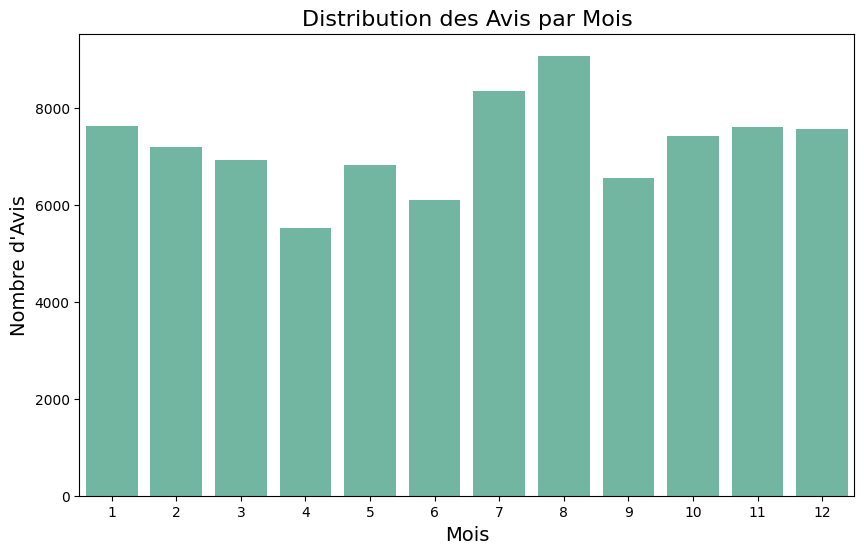

In [26]:
df_viz['month'] = pd.to_datetime(df['date']).dt.month

plt.figure(figsize=(10, 6))
sns.countplot(x='month', data=df_viz)

plt.title('Distribution des Avis par Mois', fontsize=16)
plt.xlabel('Mois', fontsize=14)
plt.ylabel('Nombre d\'Avis', fontsize=14)

plt.show()

Ce graphique montre la distribution des avis par mois. On observe une variation modérée dans le nombre d'avis au fil des mois, avec un pic en août (mois 8), qui dépasse légèrement les 8000 avis, indiquant une période d'activité plus élevée durant l'été. Le mois d'avril (mois 4) a le nombre d'avis le plus bas, avec environ 5000 avis. La plupart des autres mois ont un nombre d'avis relativement stable, oscillant autour de 6500 à 7500. Cette distribution pourrait refléter une saisonnalité, où certains mois, notamment l'été, voient une augmentation de l'engagement des utilisateurs, peut-être en raison de vacances ou de temps libre supplémentaire pour laisser des avis.

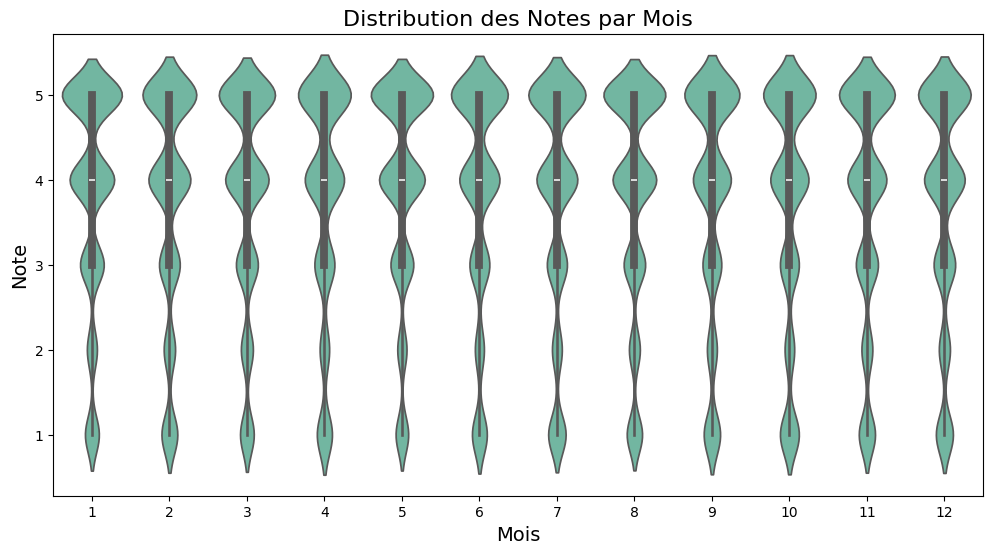

In [27]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='month', y='rating', data=df_viz)

plt.title('Distribution des Notes par Mois', fontsize=16)
plt.xlabel('Mois', fontsize=14)
plt.ylabel('Note', fontsize=14)

plt.show()

Ce graphique en forme de violon montre la distribution des notes par mois. La forme de chaque violon reflète la densité des notes pour chaque mois, avec des pics de densité autour des notes les plus fréquemment attribuées. On observe que les notes de 4 et 5 sont les plus courantes, ce qui est représenté par les parties plus larges des violons à ces niveaux de notes, suggérant une tendance vers des évaluations positives indépendamment du mois. Les notes de 1 et 2 sont beaucoup moins fréquentes, comme en témoigne la minceur des violons à ces niveaux. Globalement, il n'y a pas de variation saisonnière marquée dans la répartition des notes, ce qui indique une constance dans la satisfaction des utilisateurs tout au long de l'année.

### Analyse des utilisateurs

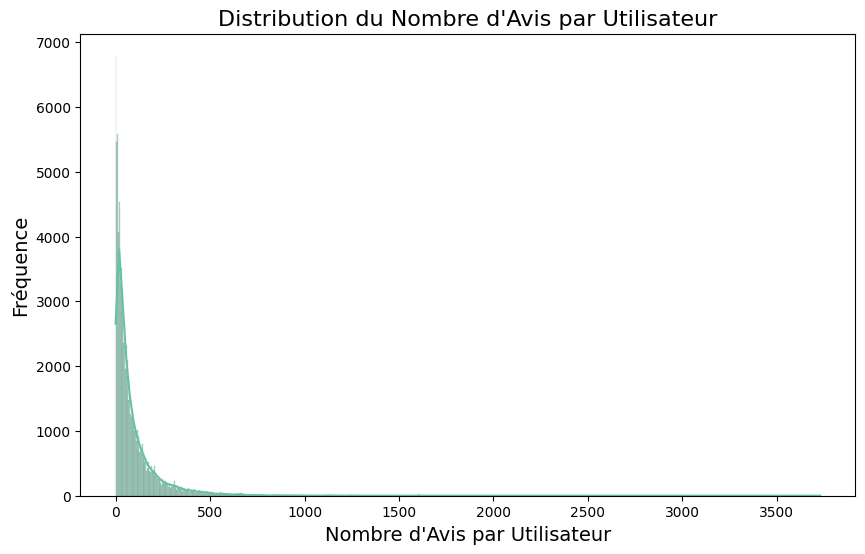

In [28]:
plt.figure(figsize=(10, 6))
sns.histplot(x='user_nb_reviews', data=df_viz, kde=True, edgecolor="black")

plt.title("Distribution du Nombre d'Avis par Utilisateur", fontsize=16)
plt.xlabel("Nombre d'Avis par Utilisateur", fontsize=14)
plt.ylabel("Fréquence", fontsize=14)

plt.show()

Ce graphique montre la distribution du nombre d'avis par utilisateur. La majorité des utilisateurs ont laissé peu d'avis, avec une fréquence très élevée pour un nombre d'avis faible, notamment entre 0 et 50 avis. Au-delà de ce seuil, le nombre d'utilisateurs ayant laissé un grand nombre d'avis diminue rapidement, indiquant une distribution fortement asymétrique et exponentiellement décroissante. Quelques utilisateurs exceptionnels ont laissé un très grand nombre d'avis (plus de 1000), mais ils sont très rares, comme le montrent les longues "queues" du graphique. Cette distribution suggère que la majorité des utilisateurs sont occasionnels dans leurs contributions, tandis qu'une minorité contribue beaucoup plus fréquemment.

In [29]:
df_viz['type_user'] = pd.cut(df_viz['user_nb_reviews'], bins=[0, 5, 20, 50, max(df_viz['user_nb_reviews'])], labels=['rarely', 'few times', 'often', 'very often'])

# Note moyenne par type d'utilisateur
df_viz.groupby('type_user').agg(Rating_Mean=('rating', 'mean'),
                            Rating_Count=('rating', 'count'))

,Rating_Mean,Rating_Count
type_user,,
rarely,3.039830,8235
few times,3.579726,16494
often,3.867474,19981
very often,3.954578,42006


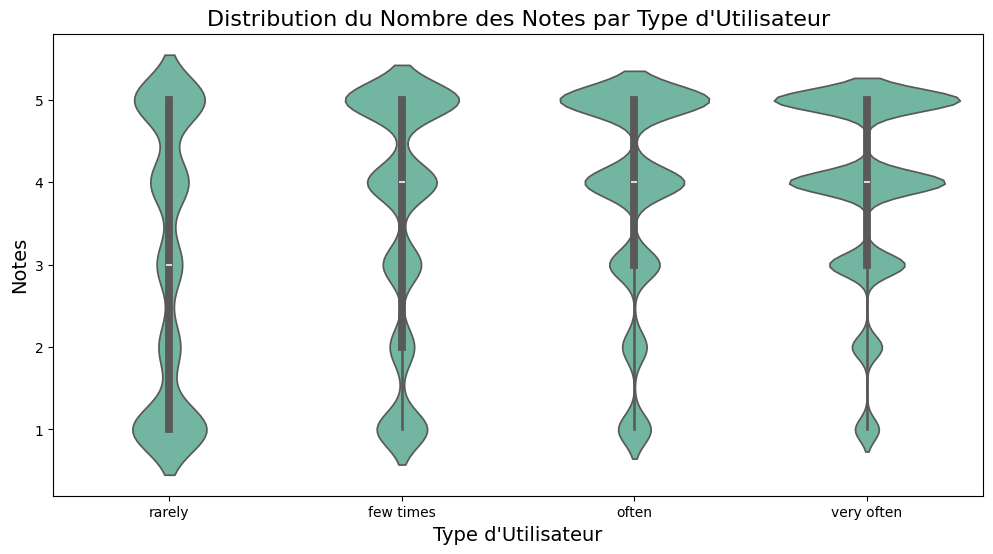

In [30]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='type_user', y='rating', data=df_viz)

plt.title('Distribution du Nombre des Notes par Type d\'Utilisateur', fontsize=16)
plt.xlabel('Type d\'Utilisateur', fontsize=14) 
plt.ylabel('Notes', fontsize=14)

plt.show()

Ce graphique en violon représente la distribution des notes en fonction du type d’utilisateur, classé par fréquence de contribution : rarely, few times, often, et very often. Les formes des violons montrent une concentration élevée de notes autour de 4 et 5 pour tous les types d'utilisateurs, avec une répartition similaire quelle que soit la fréquence des contributions. Cela indique que, indépendamment de la fréquence à laquelle les utilisateurs laissent des avis, la tendance générale reste positive.

Les utilisateurs qui laissent rarement des avis semblent cependant avoir une répartition plus uniforme sur toute l’échelle de notes, y compris des notes basses, tandis que ceux qui contribuent plus fréquemment (notamment les catégories often et very often) tendent à donner des avis majoritairement positifs (notes de 4 et 5). Cela pourrait suggérer que les contributeurs réguliers ont une perception plus positive ou sont plus enclins à donner des notes élevées.

### Analyse des différents cinémas

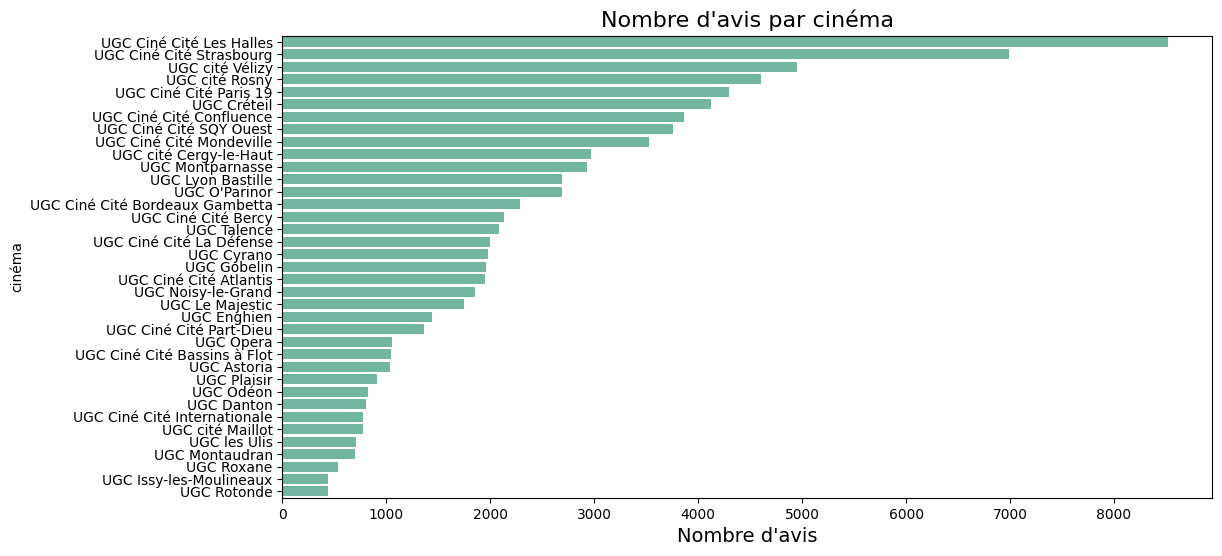

In [31]:
plt.figure(figsize=(12, 6))
sns.countplot(y="cinéma", data=df_viz, order=df_viz['cinéma'].value_counts().index)

plt.title("Nombre d'avis par cinéma", fontsize=16)
plt.xlabel("Nombre d'avis", fontsize=14)

plt.show()

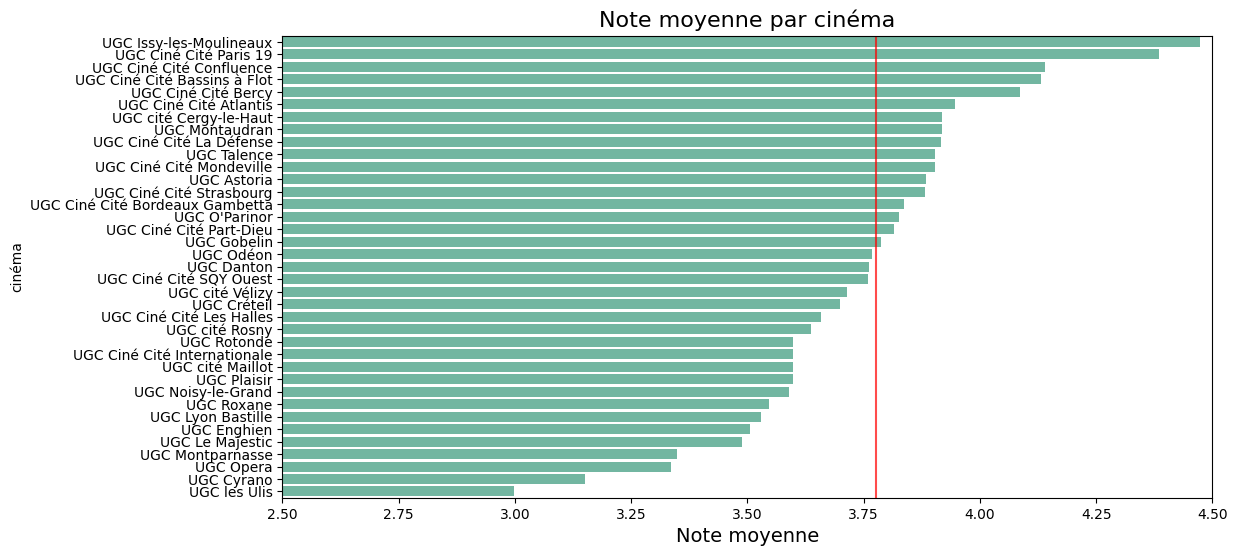

In [32]:
cinema_avg_rating = df_viz.groupby('cinéma')['rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=cinema_avg_rating.values, y=cinema_avg_rating.index)
plt.axvline(x=df_viz['rating'].mean(), c='red', alpha=0.7)

plt.title("Note moyenne par cinéma", fontsize=16)
plt.xlabel("Note moyenne", fontsize=14)
plt.xlim(2.5,4.5)

plt.show()

# TEST STATISTIQUES